# Imports:

In [1]:
import GEOMODEL as GEOMODEL
import numpy as np
import matplotlib.pyplot as plt
import pycbc
import pycbc.waveform
from pycbc.waveform import Array
from pycbc.detector import Detector
from tqdm import tqdm
import lal # this is for unit conversion
%matplotlib widget

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


# Interpolate and Plot:

Array names in the file: ['freqs', 'GEO600', 'GEO600_1', 'GEO600_2', 'GEO600_3', 'GEO600_4', 'GEO600_5', 'GEO600_6', 'GEO600_7', 'GEO600_8', 'GEO600_9', 'GEO600_10', 'GEO600_11', 'GEO600_12', 'GEO600_13', 'GEO600_14', 'GEO600_15', 'GEO600_16', 'GEO600_17', 'GEO600_18', 'GEO600_19', 'GEO600_20', 'GEO600_21', 'GEO600_22', 'GEO600_23', 'GEO600_24', 'GEO600_25', 'GEO600_26', 'GEO600_27', 'GEO600_28', 'GEO600_29', 'GEO600_30', 'GEO600_31', 'GEO600_32', 'GEO600_33', 'GEO600_34', 'GEO600_35', 'GEO600_36', 'GEO600_37', 'GEO600_38', 'GEO600_39', 'GEO600_40', 'GEO600_41', 'GEO600_42', 'GEO600_43', 'GEO600_44', 'GEO600_45', 'GEO600_46', 'GEO600_47', 'GEO600_48', 'GEO600_49', 'GEO600_50', 'GEO600_51', 'GEO600_52', 'GEO600_53', 'GEO600_54', 'GEO600_55', 'GEO600_56', 'GEO600_57', 'GEO600_58', 'GEO600_59', 'GEO600_60', 'GEO600_61', 'GEO600_62', 'GEO600_63', 'GEO600_64', 'GEO600_65', 'GEO600_66', 'GEO600_67', 'GEO600_68', 'GEO600_69', 'GEO600_70', 'GEO600_71', 'GEO600_72', 'GEO600_73', 'GEO600_74', 'G

100%|███████████████████████████████████████████████████████████████████████| 61765/61765 [01:54<00:00, 540.06it/s]


GEO600_90
GEO600_89
GEO600_88
GEO600_87
GEO600_86
GEO600_85
GEO600_84
GEO600_83
GEO600_82
GEO600_81
GEO600_80
GEO600_79
GEO600_78
GEO600_77
GEO600_76
GEO600_75
GEO600_74
GEO600_73
GEO600_72
GEO600_71
GEO600_70
GEO600_69
GEO600_68
GEO600_67
GEO600_66
GEO600_65
GEO600_64
GEO600_63
GEO600_62
GEO600_61
GEO600_60
GEO600_59
GEO600_58
GEO600_57
GEO600_56
GEO600_55
GEO600_54
GEO600_53
GEO600_52
GEO600_51
GEO600_50
GEO600_49
GEO600_48
GEO600_47
GEO600_46
GEO600_45
GEO600_44
GEO600_43
GEO600_42
GEO600_41
GEO600_40
GEO600_39
GEO600_38
61907


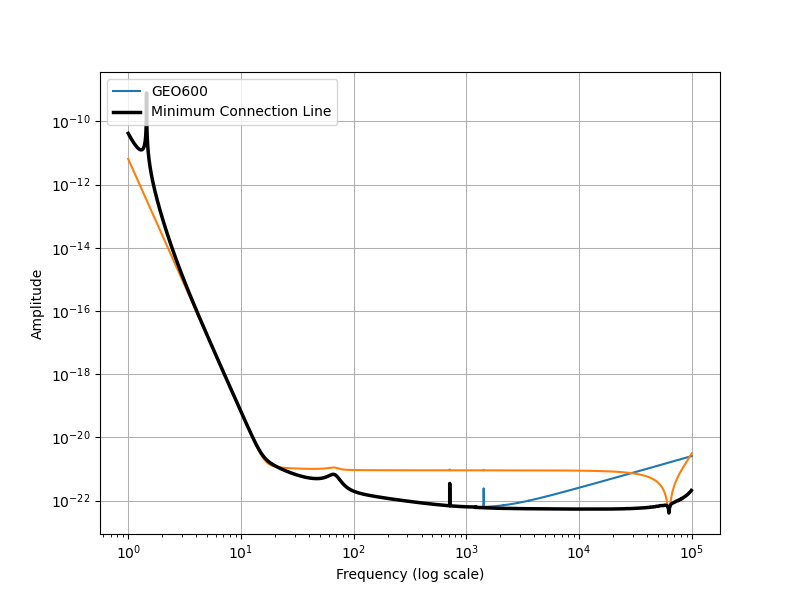

In [2]:
# Load the .npz file
plt.figure(figsize=(8,6))
with np.load('ASD_50W_100000_05.npz') as data:
    # Print the names of the arrays stored in the file
    print("Array names in the file:", data.files)
    
    # Initialize lists to hold the frequencies and the corresponding minimum values
    min_frequencies = []
    min_values = []
    
    asd = data['GEO600']
    
    min_index = np.argmin(asd)
    
    for i in tqdm(range(min_index)):
        # Append the frequency and the minimum value to the lists
        min_frequencies.append(np.logspace(0, 5, len(asd))[i])
        min_values.append(asd[i])
        
    # Plot each curve
    plt.plot(np.logspace(0, 5, len(asd)), asd, label='GEO600')
    # Loop through each array, excluding tuned geo
    
    # Get the reference array for comparison
    geo_90_asd = data['GEO600_90']
    
    # Find the index of the minimum value in the 'GEO600_90' array
    geo_90_min_index = np.argmin(geo_90_asd)
    
    for name in data.files[3:]:
        
        asd = data[name]
        # print(name)
        # Find the index of the minimum value in the array
        
        # Use geo90 index to slice the 'asd' array up to that point
        min_index = np.argmin(asd[:geo_90_min_index])
        min_frequencies.append(np.logspace(0, 5, len(asd))[min_index])
        min_values.append(asd[min_index])
        
        # Plot each curve
        # plt.plot(np.logspace(0, 5, len(asd)), asd, label=name)
    
        
    # print(min_index)
    for name in data.files[39:][::-1]:
        print(name)
        asd = data[name]
        asd_new = asd[min_index:]
        min_index_local = np.argmin(asd_new) + min_index
        min_frequencies.append(np.logspace(0, 5, len(asd))[min_index_local])
        min_values.append(asd[min_index_local])
    
    plt.plot(np.logspace(0,5,100000),data[data.files[91]])
    # print(data.files[91])
    # Create a line that connects the minimum points
    plt.plot(min_frequencies, min_values, color='black', linewidth=2.5, label='Minimum Connection Line')
    print(len(min_values))
    # Add labels and a legend to the plot
    plt.xlabel('Frequency (log scale)')
    plt.grid(True, which='major', linestyle='-', linewidth=0.75, zorder=0)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel('Amplitude')
    plt.legend(loc='upper left')
    plt.show()

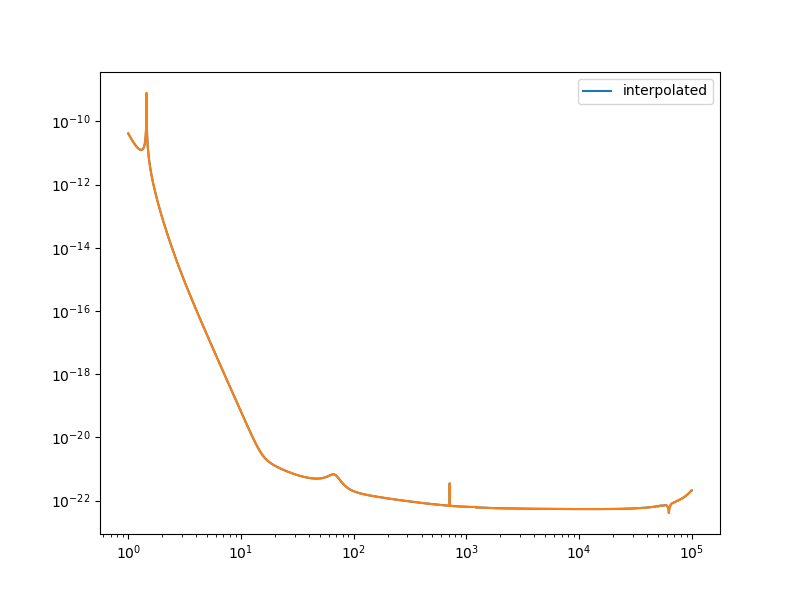

In [3]:
from scipy.interpolate import interp1d

# Define the original x-values corresponding to min_values
original_x = min_frequencies  # or use np.linspace equivalent

# Define the new x-values for the interpolated array (100,000 points)
new_x = np.logspace(0, 5, 100000)
plt.figure(figsize=(8,6))
# Interpolate min_values to the new_x
geo_scanned = np.interp(new_x, original_x, min_values)

plt.plot(new_x, geo_scanned, label='interpolated')
plt.plot(original_x, min_values)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

# Save as NPZ file:

In [6]:

# with np.load('ASD_50W_100000_05.npz') as data:
    
#     existing_data = dict(data.items())
    
#     existing_data['GEO600 Scanned'] = geo_scanned

#     # Save the updated data back to the .npz file
#     np.savez('ASD_50W_100000_05.npz', **existing_data)
